Data Wrangling

Tambem conhecido como minging, é o processo de limpar, transformar e preparar dados brutos para análise. É uma etapa crucial no fluxo de trabalho de análise de dados, pois os dados nem sempre estão em um formato adequado para serem diretamente utilizados em análises.

Envolve várias tarefas

- Coleta - obter os dados brutos de várias fontes, como bancos de dados, arquivos CSV, APIs da web, entre outros.
- Limpeza - identificar e lidar com dados ausentes, duplicados ou inconsistentes. Isso pode envolver o preenchimento de valores ausentes, remoção de duplicatas e correção de erros nos dados.
- Transformação - reformatar, reorganizar ou combinar dados para torná-los adequados para análise. Isso pode incluir a conversão de tipos de dados, a criação de variáveis derivadas, a normalização de dados, entre outros
- Integração - combinar dados de várias fontes em um único conjunto de dados coeso. Isso pode envolver a junção de tabelas com base em chaves comuns ou a combinação de dados de diferentes formatos.

- Redução - Reduzir o tamanho do conjunto de dados, removendo variáveis não relevantes ou agrupando dados em categorias mais amplas.
- Validação - verificar a qualidade dos dados transformados e garantir que eles estejam corretos, consistentes e prontos para a análise

In [1]:
import pandas as pd 
from datetime import datetime as dt 
import numpy as np 
import seaborn as sns
import math 

In [2]:
carros = pd.read_csv('/Users/larissaferreira/coder_house/aula_13/Dataset - Venda de Carros .csv', encoding='latin1', sep=';', decimal=',')

In [3]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nome_Carro      301 non-null    object 
 1   Ano_Fabricação  301 non-null    int64  
 2   Preço_Venda     299 non-null    float64
 3   Preço_Atual     297 non-null    float64
 4   Km_Rodados      297 non-null    float64
 5   Tipo_Motor      300 non-null    object 
 6   Tipo_Vendedor   301 non-null    object 
 7   Transmissão     301 non-null    object 
 8   Donos           301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [4]:
carros.head()

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
0,ritz,2014,3.35,5.59,27000.0,Gasolina,Intermediária,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Intermediária,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Gasolina,Intermediária,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Gasolina,Intermediária,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Intermediária,Manual,0


In [13]:
carros.duplicated().value_counts() #identifica os valores duplicados

# carros.duplicated(keep=False).value_counts() #remove os valores duplicados




False    299
True       2
Name: count, dtype: int64

In [15]:
carros[carros.duplicated()] # filtra valores duplicados

# carros[~carros.duplicated()] # exibe os valores não duplicados



,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
17,ertiga,2016,7.75,10.79,43000.0,Diesel,Intermediária,Manual,0
93,fortuner,2015,23.00,30.61,40000.0,Diesel,Intermediária,Automática,0


In [11]:
carros[carros.duplicated(keep='last')] #pega os ultimos duplicados por ordem

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
15,ertiga,2016,7.75,10.79,43000.0,Diesel,Intermediária,Manual,0
51,fortuner,2015,23.00,30.61,40000.0,Diesel,Intermediária,Automática,0


In [14]:
carros[carros.duplicated(keep=False)] 

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
15,ertiga,2016,7.75,10.79,43000.0,Diesel,Intermediária,Manual,0
17,ertiga,2016,7.75,10.79,43000.0,Diesel,Intermediária,Manual,0
51,fortuner,2015,23.00,30.61,40000.0,Diesel,Intermediária,Automática,0
93,fortuner,2015,23.00,30.61,40000.0,Diesel,Intermediária,Automática,0


In [16]:
carros.drop_duplicates(subset=['Nome_Carro', 'Ano_Fabricação', ]).sort_values(['Nome_Carro', "Ano_Fabricação"])

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
196,Activa 3g,2008,0.17,0.52,500000.0,Gasolina,Direta,Automática,0
165,Activa 3g,2016,0.45,0.54,500.0,Gasolina,Direta,Automática,0
173,Activa 4g,2017,0.40,0.51,1300.0,Gasolina,Direta,Automática,0
195,Bajaj ct 100,2015,0.18,0.32,35000.0,Gasolina,Direta,Manual,0
127,Bajaj Avenger 150,2016,0.75,0.80,7000.0,Gasolina,Direta,Manual,0
...,...,...,...,...,...,...,...,...,...
24,wagon r,2013,2.90,4.41,56879.0,Gasolina,Intermediária,Manual,0
18,wagon r,2015,3.25,5.09,35500.0,GNV,Intermediária,Manual,0
242,xcent,2014,4.40,7.13,34000.0,Gasolina,Intermediária,Manual,0
241,xcent,2015,4.75,7.13,35866.0,Gasolina,Intermediária,Manual,1


In [17]:
#Datas

casas=pd.read_csv("Dataset - Casas.csv",encoding='latin1', sep=';')
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10000 non-null  int64  
 1   date       10000 non-null  object 
 2   price      10000 non-null  object 
 3   bedrooms   10000 non-null  int64  
 4   bathrooms  10000 non-null  float64
 5   floors     10000 non-null  float64
 6   yr_built   10000 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 547.0+ KB


In [19]:
casas.head()


,id,date,price,bedrooms,bathrooms,floors,yr_built
0,7129300520,20141013T000000,221900,3,1.00,1.0,1955
1,6414100192,20141209T000000,538000,3,2.25,2.0,1951
2,5631500400,20150225T000000,180000,2,1.00,1.0,1933
3,2487200875,20141209T000000,604000,4,3.00,1.0,1965
4,1954400510,20150218T000000,510000,3,2.00,1.0,1987


In [26]:
#ctratando a data
casas.date.str.split('T').str[0]


0       20141013
1       20141209
2       20150225
3       20141209
4       20150218
          ...   
9995    20140926
9996    20150209
9997    20140807
9998    20150402
9999    20140609
Name: date, Length: 10000, dtype: object

In [27]:
casas['data_coleta']=pd.to_datetime(casas.date.str.split('T').str[0],format='%Y%m%d')
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           10000 non-null  int64         
 1   date         10000 non-null  object        
 2   price        10000 non-null  object        
 3   bedrooms     10000 non-null  int64         
 4   bathrooms    10000 non-null  float64       
 5   floors       10000 non-null  float64       
 6   yr_built     10000 non-null  int64         
 7   data_coleta  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 625.1+ KB


In [28]:
casas.tail()

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta
9995,322059264,20140926T000000,279000,2,1.00,1.0,1904,2014-09-26
9996,5557500270,20150209T000000,262000,3,1.50,1.0,1962,2015-02-09
9997,9164100125,20140807T000000,533000,4,1.00,1.5,1919,2014-08-07
9998,7370600045,20150402T000000,640000,3,1.75,1.0,1950,2015-04-02
9999,8594400060,20140609T000000,285000,3,2.25,2.0,1987,2014-06-09


In [29]:
casas['data_formatada']=casas.data_coleta.dt.strftime('%d/%m/%Y')
casas

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada
0,7129300520,20141013T000000,221900,3,1.00,1.0,1955,2014-10-13,13/10/2014
1,6414100192,20141209T000000,538000,3,2.25,2.0,1951,2014-12-09,09/12/2014
2,5631500400,20150225T000000,180000,2,1.00,1.0,1933,2015-02-25,25/02/2015
3,2487200875,20141209T000000,604000,4,3.00,1.0,1965,2014-12-09,09/12/2014
4,1954400510,20150218T000000,510000,3,2.00,1.0,1987,2015-02-18,18/02/2015
...,...,...,...,...,...,...,...,...,...
9995,322059264,20140926T000000,279000,2,1.00,1.0,1904,2014-09-26,26/09/2014
9996,5557500270,20150209T000000,262000,3,1.50,1.0,1962,2015-02-09,09/02/2015
9997,9164100125,20140807T000000,533000,4,1.00,1.5,1919,2014-08-07,07/08/2014
9998,7370600045,20150402T000000,640000,3,1.75,1.0,1950,2015-04-02,02/04/2015


In [30]:
#ORDENACAO

casas=casas.sort_values('yr_built').reset_index(drop=True)
casas

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada
0,6300000337,20140529T000000,550000,5,2.00,1.0,1900,2014-05-29,29/05/2014
1,5694000710,20141107T000000,352950,3,1.00,1.5,1900,2014-11-07,07/11/2014
2,2767602490,20140724T000000,551000,3,1.00,1.0,1900,2014-07-24,24/07/2014
3,1931300665,20141009T000000,850000,3,3.00,1.5,1900,2014-10-09,09/10/2014
4,3797000830,20140530T000000,425000,3,1.75,1.0,1900,2014-05-30,30/05/2014
...,...,...,...,...,...,...,...,...,...
9995,1250200495,20140624T000000,455000,2,1.50,2.0,2015,2014-06-24,24/06/2014
9996,558100090,20150312T000000,628000,5,2.75,2.0,2015,2015-03-12,12/03/2015
9997,3076500830,20141029T000000,385195,1,1.00,1.5,2015,2014-10-29,29/10/2014
9998,1832100030,20140625T000000,597326,4,4.00,2.0,2015,2014-06-25,25/06/2014


In [31]:
casas.price.astype(float)


ValueError: could not convert string to float: '1,30E+09'

In [32]:
casas[casas.price.str.contains('e+')].price.value_counts()# IDENTIFICAR OS VALORES COMO STRINGS


price
1.05e+006    16
1.15e+006    16
1.1e+006     15
1.25e+006    15
1.2e+006     14
             ..
1.62e+006     1
1.04e+006     1
1.53e+006     1
2.85e+006     1
1.61e+006     1
Name: count, Length: 101, dtype: int64

In [33]:
casas.price=casas.price.str.upper() # TRANSFORMA TODOS EM MAIUSCULO
casas.price=casas.price.str.replace(',','.') # SUBSTITUI VIRGULA POR PONTO

In [35]:
casas['preco']=np.where(casas.price.str.contains('E+'), casas.price.str.split('E+').str[0].astype(float)*1000000,casas.price.astype(float)).astype(int)
# casas['preco'].value_counts(dropna=False) #identificar valores nulos 
casas['preco'].value_counts()

preco
350000     92
450000     82
550000     74
425000     73
250000     69
           ..
431750      1
221700      1
271500      1
3070000     1
597326      1
Name: count, Length: 2289, dtype: int64

In [38]:
#GROUPYBY

preco_medio=casas.groupby('yr_built')[['preco']].mean().round(0).astype(int)
preco_medio

,preco
yr_built,
1900,553440
1901,474711
1902,632447
1903,465892
1904,500113
...,...
2011,832827
2012,468900
2013,736244


Text(0.5, 1.0, 'Preço médio por ano de construção')

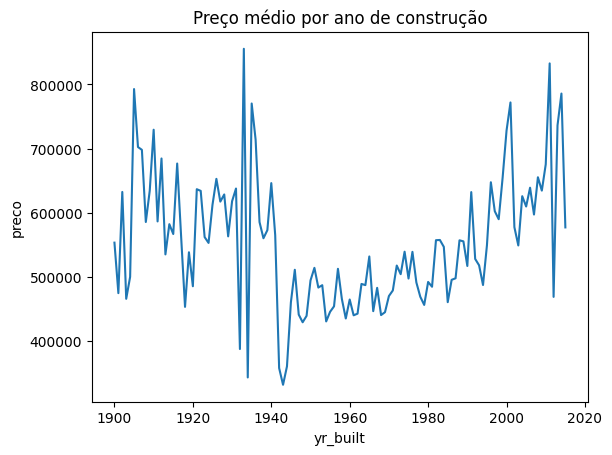

In [39]:
sns.lineplot(x=preco_medio.index,y=preco_medio.preco).set_title('Preço médio por ano de construção')


In [40]:
# amostra de 10%
amostra_casas_simples=casas.sample(n=len(casas)//10, random_state=25)
amostra_casas_simples

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada,preco
3555,4037600115,20140922T000000,415500,3,1.50,1.0,1958,2014-09-22,22/09/2014,415500
4078,9542400025,20140916T000000,720000,4,1.75,1.5,1962,2014-09-16,16/09/2014,720000
8445,2322059136,20150309T000000,859000,3,2.50,2.0,1999,2015-03-09,09/03/2015,859000
5939,1774230300,20150306T000000,615000,3,2.50,1.0,1978,2015-03-06,06/03/2015,615000
5583,192600100,20140626T000000,440000,4,2.50,1.0,1976,2014-06-26,26/06/2014,440000
...,...,...,...,...,...,...,...,...,...,...
4367,686200510,20141122T000000,643000,3,2.75,1.0,1965,2014-11-22,22/11/2014,643000
8622,9406540130,20150403T000000,489000,4,2.50,2.0,2000,2015-04-03,03/04/2015,489000
67,7839300185,20150206T000000,225000,3,1.00,1.5,1903,2015-02-06,06/02/2015,225000
1724,2818100255,20141029T000000,922000,4,2.50,1.0,1941,2014-10-29,29/10/2014,922000


In [41]:
# amostra de 10% para cada ano de construção
anos=casas.yr_built.unique()
amostra_casas_extratificada=pd.DataFrame()
for i in anos:
    aux=casas[casas.yr_built==i].copy()
    amostra=aux.sample(n=math.ceil(len(aux)*0.1),random_state=25)
    amostra_casas_extratificada=pd.concat([amostra_casas_extratificada,amostra])

amostra_casas_extratificada

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada,preco
19,4232902615,20150428T000000,819000,3,1.00,2.0,1900,2015-04-28,28/04/2015,819000
33,7883604065,20150501T000000,210000,2,1.00,1.5,1900,2015-05-01,01/05/2015,210000
6,7129302095,20150213T000000,265000,3,1.00,1.5,1900,2015-02-13,13/02/2015,265000
11,7935000125,20140605T000000,440000,3,1.00,1.0,1900,2014-06-05,05/06/2014,440000
47,7942601155,20140722T000000,302282,2,1.00,1.5,1901,2014-07-22,22/07/2014,302282
...,...,...,...,...,...,...,...,...,...,...
9934,2767603649,20140730T000000,520000,3,2.25,3.0,2014,2014-07-30,30/07/2014,520000
9974,2705600068,20150327T000000,539950,3,2.50,3.0,2014,2015-03-27,27/03/2015,539950
9965,8929000280,20140519T000000,386591,3,2.50,2.0,2014,2014-05-19,19/05/2014,386591
9941,7203220130,20150127T000000,994900,4,3.50,2.0,2014,2015-01-27,27/01/2015,994900


In [44]:
# amostra de 10% para conglomerados de 10%(1000)
amostra_casas_conglomerados=pd.DataFrame()
n_conglomerado=len(casas)//10
aux=casas.copy()
while True:
    conglomerado=aux.sample(n=n_conglomerado, random_state=25)
    amostra_casas_conglomerados=pd.concat([amostra_casas_conglomerados, conglomerado.sample(frac=0.1, random_state=25)])
    aux.drop(conglomerado.index, axis=0, inplace=True)
    if len(aux)==0:
        break

amostra_casas_conglomerados

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada,preco
3800,8032700140,20141028T000000,830000,5,3.00,2.0,1960,2014-10-28,28/10/2014,830000
6515,3396200090,20140520T000000,639000,4,2.50,2.0,1982,2014-05-20,20/05/2014,639000
6098,7932000041,20150512T000000,602500,2,2.50,1.0,1979,2015-05-12,12/05/2015,602500
597,1232001070,20140814T000000,485000,2,1.00,1.0,1916,2014-08-14,14/08/2014,485000
8219,4136950140,20141215T000000,250000,3,2.50,2.0,1997,2014-12-15,15/12/2014,250000
...,...,...,...,...,...,...,...,...,...,...
7989,322069153,20140827T000000,364250,3,2.50,2.0,1994,2014-08-27,27/08/2014,364250
1359,859000160,20141203T000000,375000,4,2.00,1.0,1930,2014-12-03,03/12/2014,375000
8899,7234601544,20140825T000000,660000,3,3.00,2.0,2002,2014-08-25,25/08/2014,660000
7566,624110540,20141205T000000,1.18E+09,4,3.25,2.0,1991,2014-12-05,05/12/2014,1180000


In [46]:
# amostra sem reposição
amostra_casas_reposicao=casas.sample(n=20000, random_state=25)
amostra_casas_reposicao

ValueError: Cannot take a larger sample than population when 'replace=False'

In [47]:
# amostra com reposição
amostra_casas_reposicao=casas.sample(n=20000, random_state=25, replace=True)
amostra_casas_reposicao

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada,preco
8510,8961990090,20140624T000000,535000,3,2.50,2.0,1999,2014-06-24,24/06/2014,535000
6618,8899210090,20140714T000000,360000,3,2.25,1.0,1983,2014-07-14,14/07/2014,360000
2934,1787600094,20141106T000000,285000,3,1.00,1.0,1953,2014-11-06,06/11/2014,285000
8447,1526079026,20140813T000000,487500,5,3.50,2.0,1999,2014-08-13,13/08/2014,487500
1175,952000055,20150206T000000,530000,3,1.00,1.5,1927,2015-02-06,06/02/2015,530000
...,...,...,...,...,...,...,...,...,...,...
6977,3904902500,20141219T000000,675000,4,2.50,2.0,1986,2014-12-19,19/12/2014,675000
2971,2222900082,20140513T000000,449500,3,2.00,1.0,1954,2014-05-13,13/05/2014,449500
1905,2113700825,20140731T000000,172000,3,1.00,1.0,1943,2014-07-31,31/07/2014,172000
6822,1133000050,20150420T000000,362000,4,2.50,1.0,1985,2015-04-20,20/04/2015,362000


In [48]:
amostra_casas_reposicao.index.value_counts()


2808    10
7532    10
8780    10
9080     9
4956     8
        ..
3384     1
1145     1
2566     1
418      1
9830     1
Name: count, Length: 8614, dtype: int64